In [1]:
from matplotlib import pyplot
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import time

from L3.zad1 import generate_data
from L3.k_means import KMeans

a)

In [2]:

def plot(number, dimension, distributions_number, probabilities, mi, sigma):
    data = generate_data(number, dimension, distributions_number, probabilities, mi, sigma)
    
    partition = KMeans(k=5).fit(data)
    colormap = "cmyrg"
    pyplot.scatter(*data.T, c=[colormap[i] for i in partition.groups], alpha=0.5)
    pyplot.scatter(*partition.group_centers.T, c="k")
    pyplot.show()

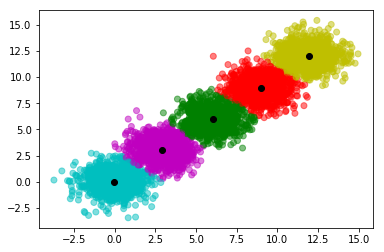

In [3]:
number = 5000
dimension = 2
distributions_number = 5
probabilities = None
mi = np.array([3 * k * np.ones(dimension) for k in range(distributions_number)])
sigma = np.array([np.identity(dimension)] * distributions_number)
plot(number, dimension, distributions_number, probabilities, mi, sigma)

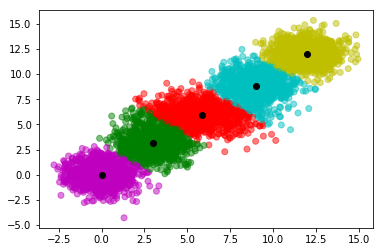

In [4]:
number = 5000
dimension = 2
distributions_number = 5
probabilities = None
mi = np.array([3 * k * np.ones(dimension) for k in range(distributions_number)])
sigma = np.array([np.identity(dimension)] * distributions_number)
sigma[2] = np.array([[3, 0], [0, 1]])
plot(number, dimension, distributions_number, probabilities, mi, sigma)

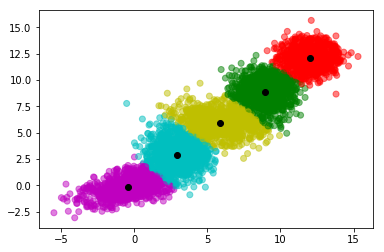

In [5]:
number = 5000
dimension = 2
distributions_number = 5
probabilities = None
mi = np.array([3 * k * np.ones(dimension) for k in range(distributions_number)])
sigma = np.array([np.identity(dimension)] * distributions_number)
sigma[2] = np.array([[3, 0], [0, 1]])
sigma[0] = np.array([[3, 1], [1, 1]])
plot(number, dimension, distributions_number, probabilities, mi, sigma)

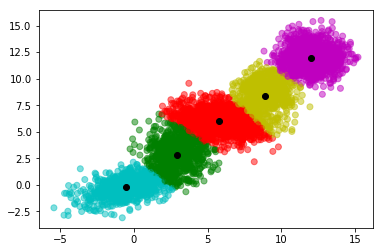

In [6]:
number = 5000
dimension = 2
distributions_number = 5
probabilities = np.array([0.2, 0.1, 0.3, 0.1, 0.3])
mi = np.array([3 * k * np.ones(dimension) for k in range(distributions_number)])
sigma = np.array([np.identity(dimension)] * distributions_number)
sigma[2] = np.array([[3, 0], [0, 1]])
sigma[0] = np.array([[3, 1], [1, 1]])
plot(number, dimension, distributions_number, probabilities, mi, sigma)

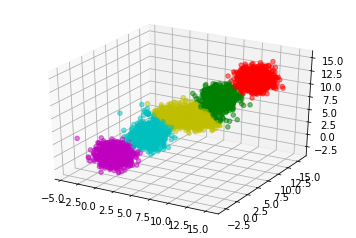

In [7]:
number = 5000
dimension = 3
distributions_number = 5
probabilities = None
mi = np.array([3 * k * np.ones(dimension) for k in range(distributions_number)])
sigma = np.array([np.identity(dimension)] * distributions_number)
sigma[2] = np.array([[3, 1, 0], [1, 1, 0], [0, 0, 1]])

data = generate_data(number, dimension, distributions_number, probabilities, mi, sigma)
partition = KMeans(k=5).fit(data)
colormap = "cmyrg"
figure = pyplot.figure()
plot = figure.add_subplot(111, projection="3d")
plot.scatter(*data.T[:2], zs=data.T[2], c=[colormap[i] for i in partition.groups], alpha=0.5)
plot.scatter(*partition.group_centers.T[:2], 
               zs=partition.group_centers.T[2], c="k")
pyplot.show()

In [12]:
number = 5000
dimension = 100
distributions_number = 10
probabilities = None
mi = np.array([3 * k * np.ones(dimension) for k in range(distributions_number)])
sigma = np.array([np.identity(dimension)] * distributions_number)

data = generate_data(number, dimension, distributions_number, probabilities, mi, sigma)

t0 = time.time()
partition = KMeans(k=5).fit(data)
t1 = time.time()
print("Time: ", t1-t0)
print("Average center to center distance: ", partition.center_to_center_average_distance())
print("Average distance from group element to center", partition.average_distances_to_center(data))

Time:  0.019735097885131836
Average center to center distance:  [ 124.02660941   90.13506346  177.07104193  108.69513176  101.48905544]
Average distance from group element to center [ 240.12282486  240.12030132  240.12245892  240.12177984  240.12014514]
